### Project 1

Project description: 
- Read data into Jupyter notebook, use pandas to import data into a data frame
- preprocess data: explore data, address missing data, categorical data, if there is any, and data scaling. Justify the type of scaling used in this project. 
- train your dataset using all the linear regression models you've learned so far. If your model has a scaling parameter(s) use Grid Search to find the best scaling parameter. Use plots and graphs to help you get a better glimpse of the results. 
- Then use cross validation to find average training and testing score. 
- Your submission should have at least the following regression models: KNN repressor, linear regression, Ridge, Lasso, polynomial regression, SVM both simple and with kernels. 
- Finally find the best repressor for this dataset and train your model on the entire dataset using the best parameters and predict the market price for the test_set.
- submit IPython notebook. Use markdown to provide an inline report for this project.

##### <font color = 'red'> Important note: All the group members should participate in completing this project.  This includes coding, preparing report and testing the models. 

*** Importing Libraries and dataset***

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('bitcoin_dataset.csv')
test = pd.read_csv('test_set.csv')
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906 entries, 0 to 2905
Data columns (total 24 columns):
Date                                                   2906 non-null object
btc_market_price                                       2906 non-null float64
btc_total_bitcoins                                     2879 non-null float64
btc_market_cap                                         2906 non-null float64
btc_trade_volume                                       2885 non-null float64
btc_blocks_size                                        2877 non-null float64
btc_avg_block_size                                     2906 non-null float64
btc_n_orphaned_blocks                                  2906 non-null int64
btc_n_transactions_per_block                           2906 non-null float64
btc_median_confirmation_time                           2894 non-null float64
btc_hash_rate                                          2906 non-null float64
btc_difficulty                                   

In [4]:
data.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010 0:00,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2/18/2010 0:00,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2/19/2010 0:00,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2/20/2010 0:00,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2/21/2010 0:00,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


In [5]:
data.shape

(2906, 24)

In [6]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
btc_market_price,2906.0,8.391042e+02,2.304972e+03,0.000000e+00,6.653465e+00,2.351300e+02,5.941912e+02,1.949868e+04
btc_total_bitcoins,2879.0,1.151138e+07,4.200024e+06,2.043200e+06,8.485300e+06,1.243115e+07,1.520051e+07,1.683769e+07
btc_market_cap,2906.0,1.344255e+10,3.866150e+10,0.000000e+00,5.363081e+07,3.346869e+09,8.075525e+09,3.265250e+11
btc_trade_volume,2885.0,7.398381e+07,2.924228e+08,0.000000e+00,2.916456e+05,1.001414e+07,2.834038e+07,5.352016e+09
btc_blocks_size,2877.0,3.550550e+04,4.361863e+04,0.000000e+00,7.810000e+02,1.518300e+04,5.829300e+04,1.544446e+05
btc_avg_block_size,2906.0,3.503659e-01,3.531685e-01,2.163350e-04,2.417726e-02,1.960218e-01,6.760651e-01,1.110327e+00
btc_n_orphaned_blocks,2906.0,3.640743e-01,8.422593e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00
btc_n_transactions_per_block,2906.0,6.716737e+02,6.895613e+02,1.000000e+00,5.400000e+01,3.750000e+02,1.232995e+03,2.722625e+03
btc_median_confirmation_time,2894.0,7.501113e+00,4.974549e+00,0.000000e+00,6.066667e+00,7.916667e+00,1.020833e+01,4.773333e+01
btc_hash_rate,2906.0,1.244070e+06,2.924141e+06,2.250000e-05,1.160880e+01,2.176189e+04,1.035363e+06,2.160975e+07


*** Checking for null values ***

In [7]:
data.isnull().sum()

Date                                                    0
btc_market_price                                        0
btc_total_bitcoins                                     27
btc_market_cap                                          0
btc_trade_volume                                       21
btc_blocks_size                                        29
btc_avg_block_size                                      0
btc_n_orphaned_blocks                                   0
btc_n_transactions_per_block                            0
btc_median_confirmation_time                           12
btc_hash_rate                                           0
btc_difficulty                                         16
btc_miners_revenue                                      0
btc_transaction_fees                                   10
btc_cost_per_transaction_percent                        0
btc_cost_per_transaction                                0
btc_n_unique_addresses                                  0
btc_n_transact

### The total rows with missing values accounts to less than 4% of the total rows. So we have created two datasets where one of them, data1 has the data with missing values dropped and the data2 has the missing values imputed with median. In order to identify which imputation works better we have done regression on both data sets.

*** Creating 2 datasets. One with missing values imputed by median and one with dropping missing values ***

In [8]:
# data1 is created with dropping missing values
data1 = data.dropna()
data1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
btc_market_price,2791.0,8.451715e+02,2.338351e+03,0.000000e+00,6.767500e+00,2.358600e+02,5.915450e+02,1.949868e+04
btc_total_bitcoins,2791.0,1.151406e+07,4.163732e+06,2.043200e+06,8.499725e+06,1.240065e+07,1.515640e+07,1.683769e+07
btc_market_cap,2791.0,1.353681e+10,3.922578e+10,0.000000e+00,5.363678e+07,3.360446e+09,8.025327e+09,3.265250e+11
btc_trade_volume,2791.0,7.485297e+07,2.968876e+08,0.000000e+00,3.029615e+05,1.021003e+07,2.806062e+07,5.352016e+09
btc_blocks_size,2791.0,3.501590e+04,4.319328e+04,0.000000e+00,8.125000e+02,1.490100e+04,5.703550e+04,1.544446e+05
btc_avg_block_size,2791.0,3.510033e-01,3.516296e-01,2.163350e-04,2.482052e-02,1.989200e-01,6.736502e-01,1.110327e+00
btc_n_orphaned_blocks,2791.0,3.694016e-01,8.483902e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00
btc_n_transactions_per_block,2791.0,6.725812e+02,6.860880e+02,1.000000e+00,5.500000e+01,3.770000e+02,1.220000e+03,2.722625e+03
btc_median_confirmation_time,2791.0,7.574398e+00,4.913946e+00,0.000000e+00,6.200000e+00,7.933333e+00,1.020000e+01,4.773333e+01
btc_hash_rate,2791.0,1.231861e+06,2.933729e+06,2.250000e-05,1.169601e+01,2.488935e+04,1.019200e+06,2.160975e+07


In [9]:
# data2 is created with imputing median in place of missing values
data2 = data.fillna(data.median())
data2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
btc_market_price,2906.0,8.391042e+02,2.304972e+03,0.000000e+00,6.653465e+00,2.351300e+02,5.941912e+02,1.949868e+04
btc_total_bitcoins,2906.0,1.151992e+07,4.181392e+06,2.043200e+06,8.536962e+06,1.243115e+07,1.517080e+07,1.683769e+07
btc_market_cap,2906.0,1.344255e+10,3.866150e+10,0.000000e+00,5.363081e+07,3.346869e+09,8.075525e+09,3.265250e+11
btc_trade_volume,2906.0,7.352154e+07,2.914143e+08,0.000000e+00,2.968431e+05,1.001414e+07,2.823617e+07,5.352016e+09
btc_blocks_size,2906.0,3.530270e+04,4.344737e+04,0.000000e+00,8.015000e+02,1.518300e+04,5.742650e+04,1.544446e+05
btc_avg_block_size,2906.0,3.503659e-01,3.531685e-01,2.163350e-04,2.417726e-02,1.960218e-01,6.760651e-01,1.110327e+00
btc_n_orphaned_blocks,2906.0,3.640743e-01,8.422593e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00
btc_n_transactions_per_block,2906.0,6.716737e+02,6.895613e+02,1.000000e+00,5.400000e+01,3.750000e+02,1.232995e+03,2.722625e+03
btc_median_confirmation_time,2906.0,7.502829e+00,4.964336e+00,0.000000e+00,6.066667e+00,7.916667e+00,1.015000e+01,4.773333e+01
btc_hash_rate,2906.0,1.244070e+06,2.924141e+06,2.250000e-05,1.160880e+01,2.176189e+04,1.035363e+06,2.160975e+07


*** Correlation matrix ***

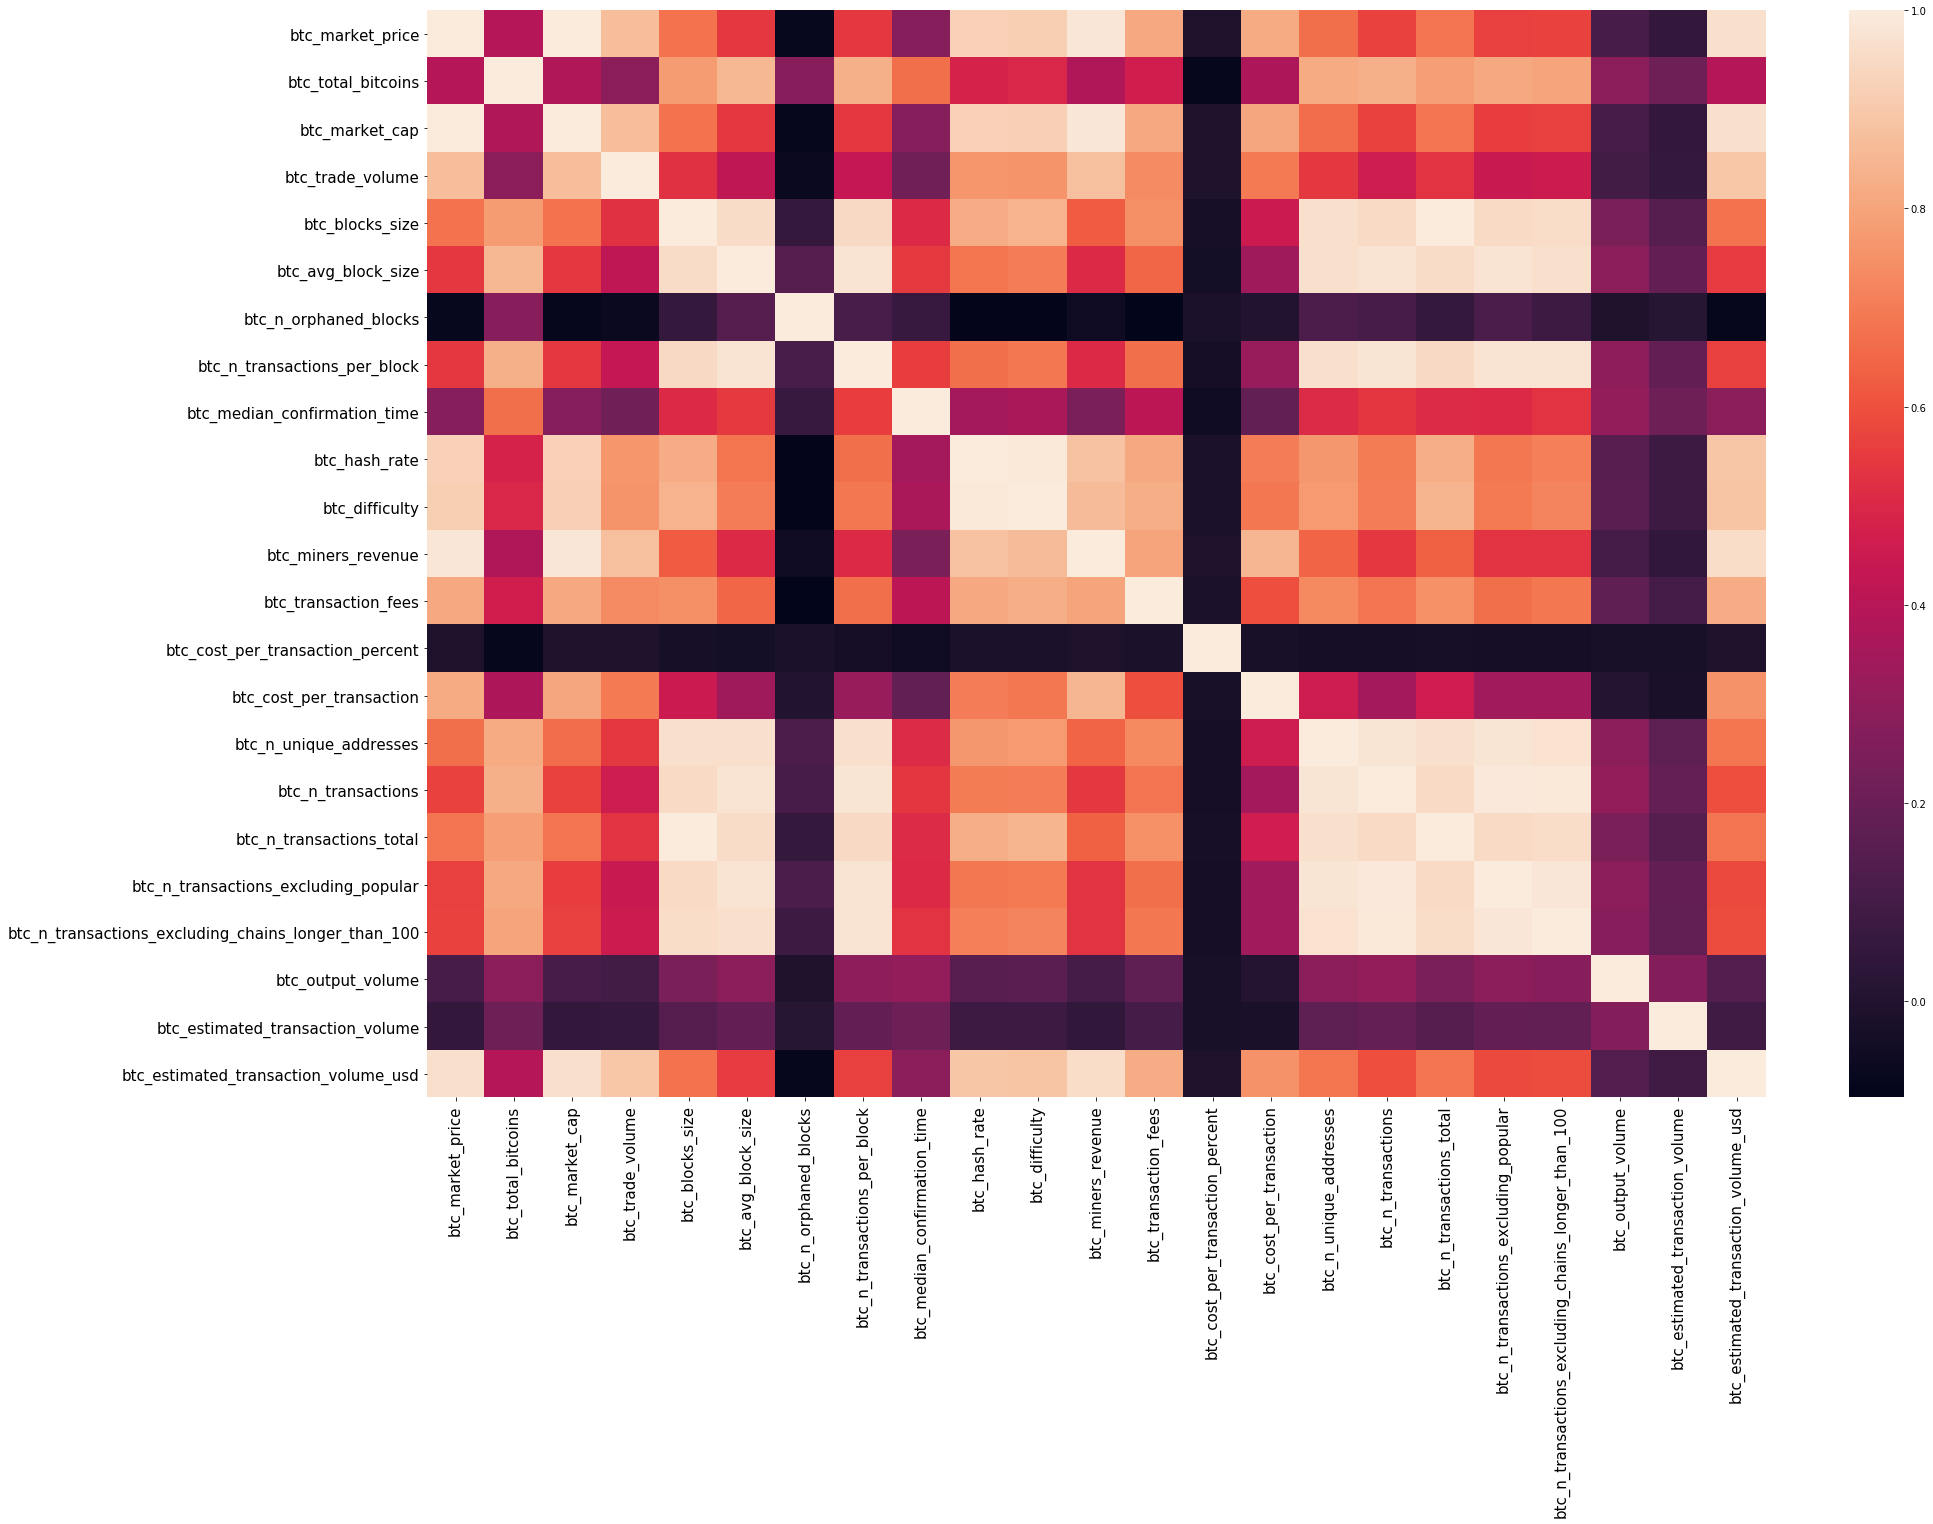

In [10]:
plt.figure(figsize=(30,20))
plt.tick_params(axis='both',labelsize=15)
sns.heatmap(data1.corr())

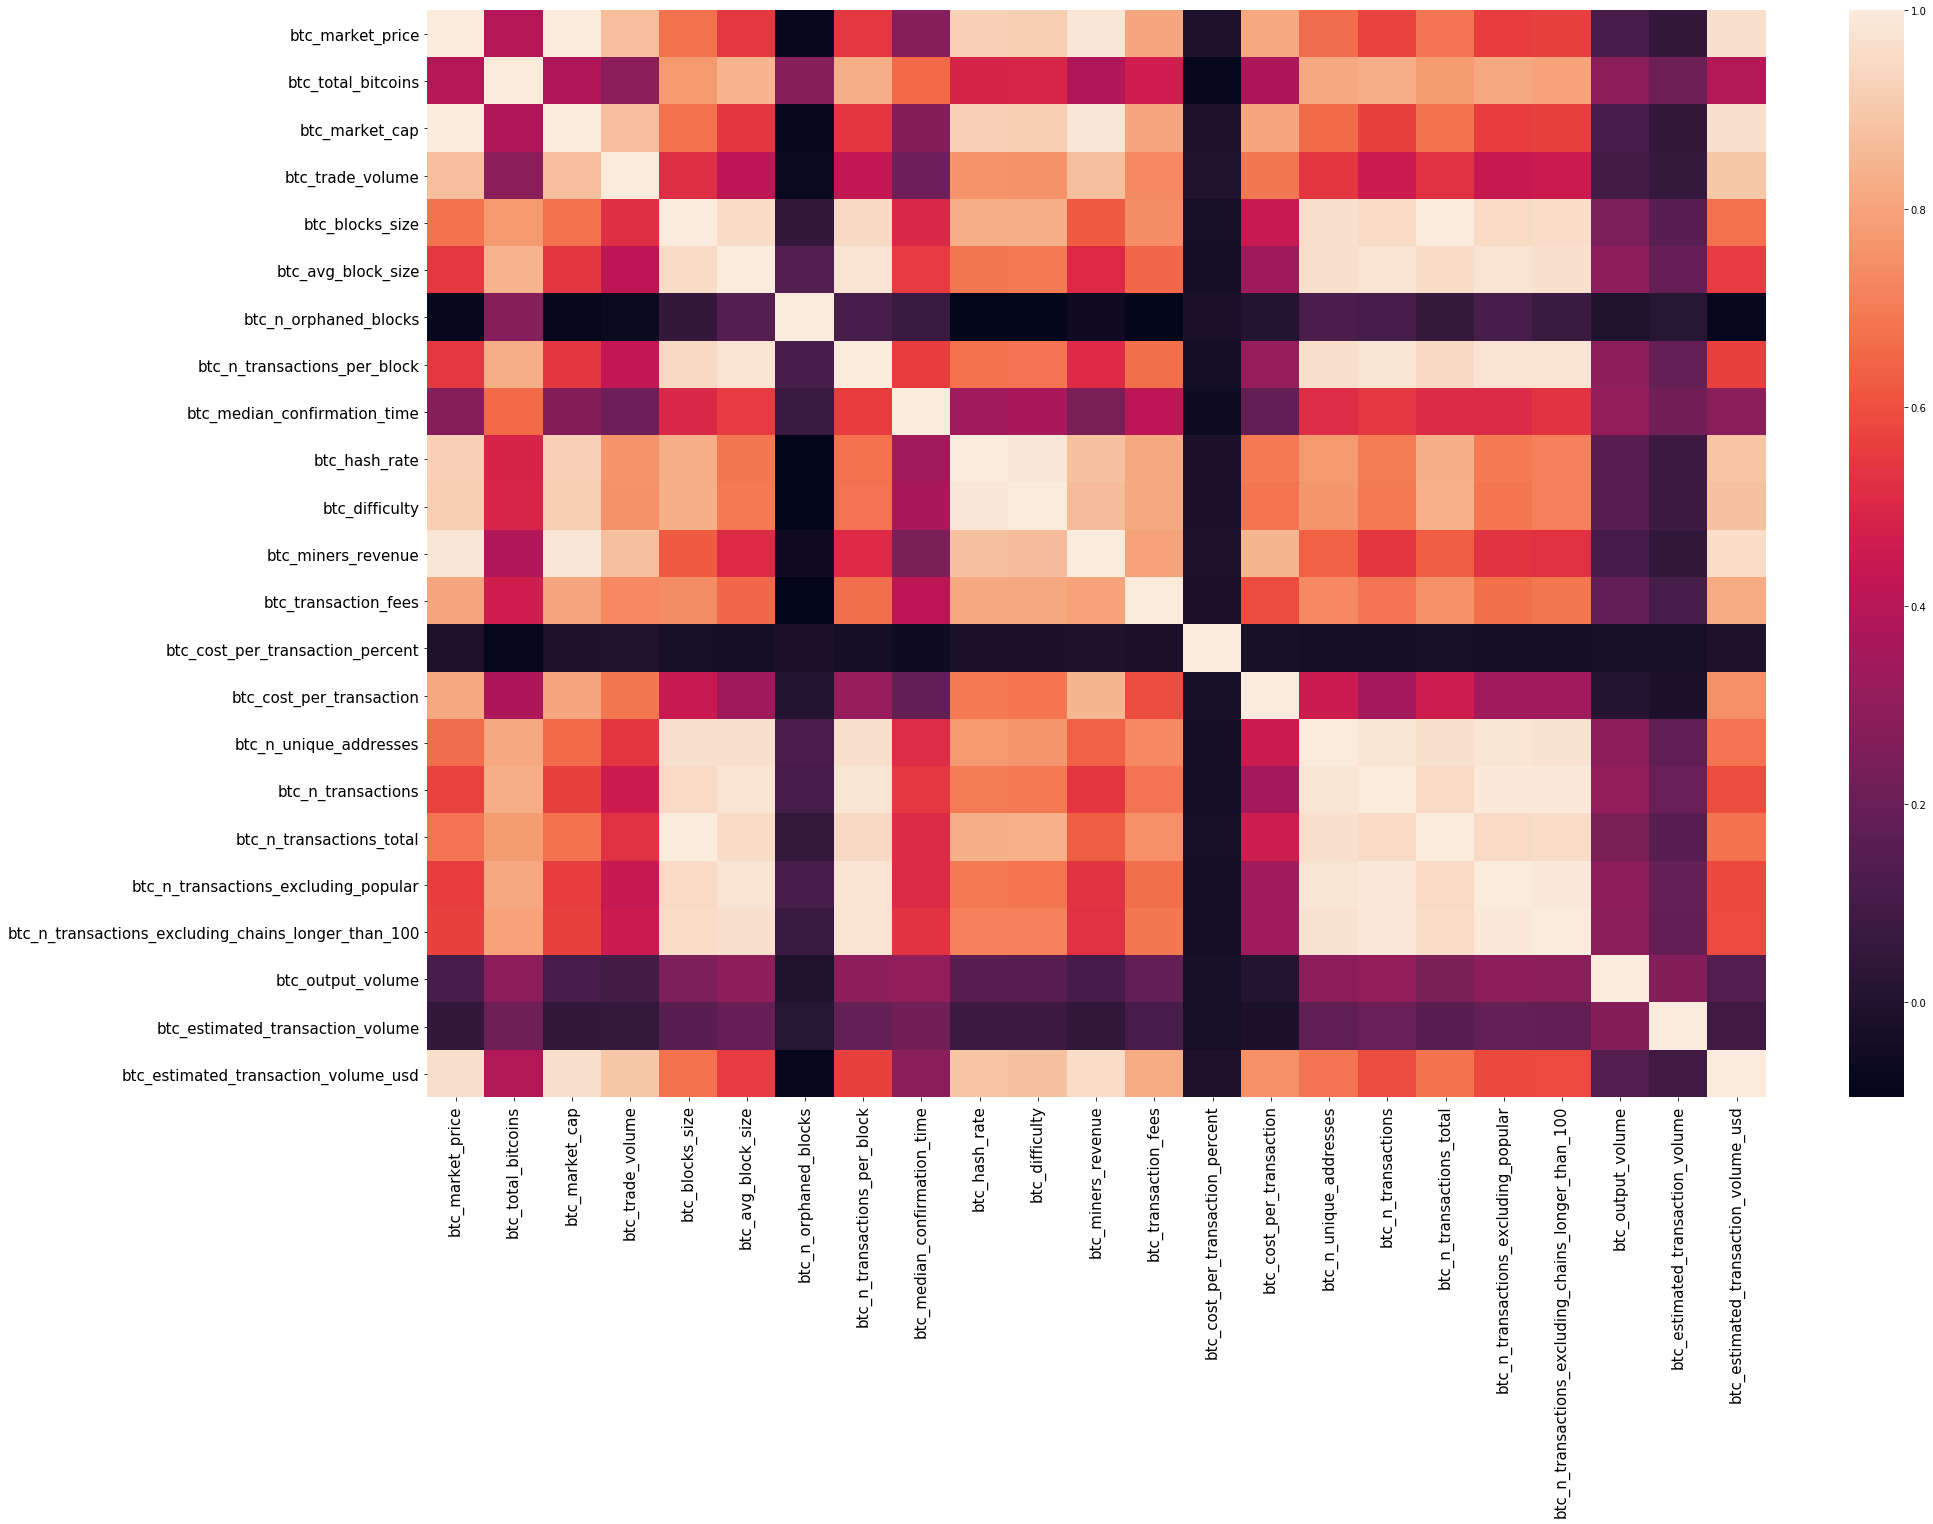

In [11]:
plt.figure(figsize=(30,20))
plt.tick_params(axis='both',labelsize=15)
sns.heatmap(data2.corr())

### The correlation of btc_market_ price and btc_market_cap, btc_trade_value, btc_hash_rate, btc_difficulty, btc_minors_revenue and btc_transaction_fees is found to be  very high.  

*** Visualization ***

(array([2649.,   93.,   65.,   23.,   11.,   21.,    6.,   21.,   12.,
           5.]), array([    0.      ,  1949.868333,  3899.736666,  5849.604999,
         7799.473332,  9749.341665, 11699.209998, 13649.078331,
        15598.946664, 17548.814997, 19498.68333 ]), <a list of 10 Patch objects>)

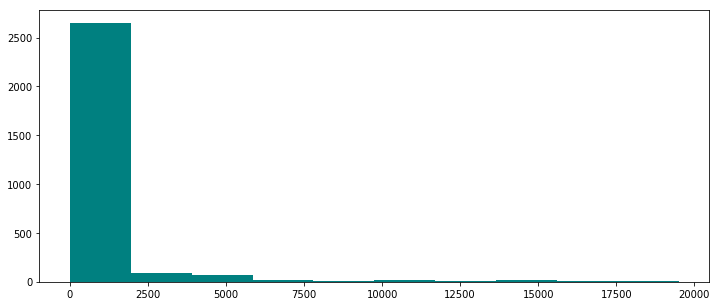

In [12]:
# Histogram to see the distribution on Bitcoin Market price
plt.figure(figsize=(12,5))
plt.hist(data2['btc_market_price'],bins=10,color='teal')

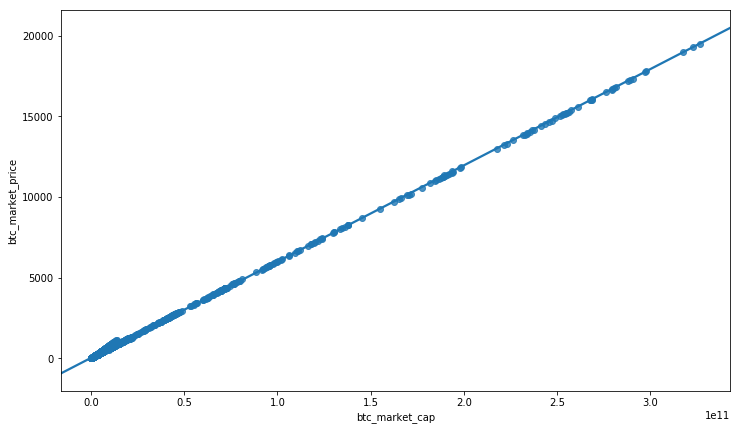

In [13]:
#Scatterplot between Bitcoin price & Bitcoin Market cap
plt.figure(figsize=(12,7))
sns.regplot(x=data2['btc_market_cap'],y=data2['btc_market_price'],data=data2)

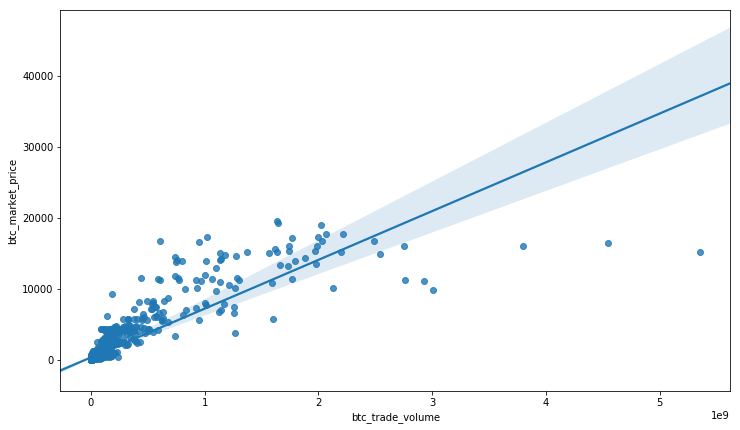

In [14]:
#Scatterplot between Bitcoin price & Bitcoin Trade Volume
plt.figure(figsize=(12,7))
sns.regplot(x=data2['btc_trade_volume'],y=data2['btc_market_price'],data=data2)

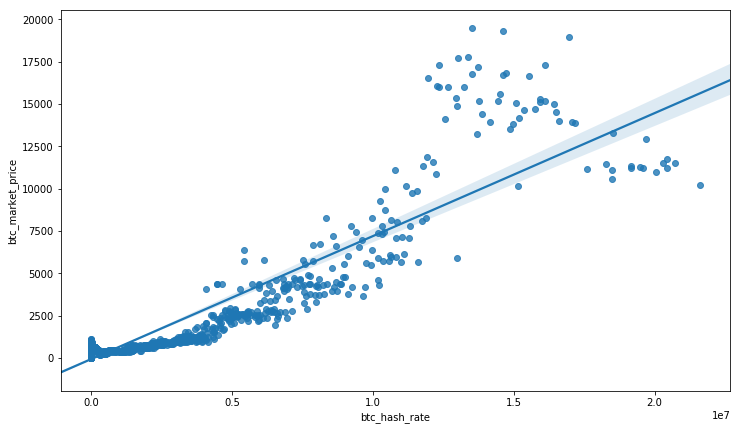

In [15]:
#Scatterplot between Bitcoin price & Bitcoin hash rate
plt.figure(figsize=(12,7))
sns.regplot(x=data2['btc_hash_rate'],y=data2['btc_market_price'],data=data2)

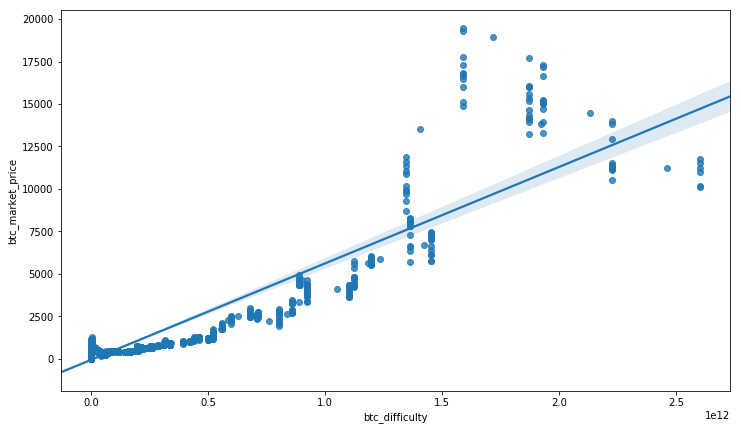

In [16]:
#Scatterplot between Bitcoin price & Bitcoin difficulty
plt.figure(figsize=(12,7))
sns.regplot(x=data2['btc_difficulty'],y=data2['btc_market_price'],data=data2)

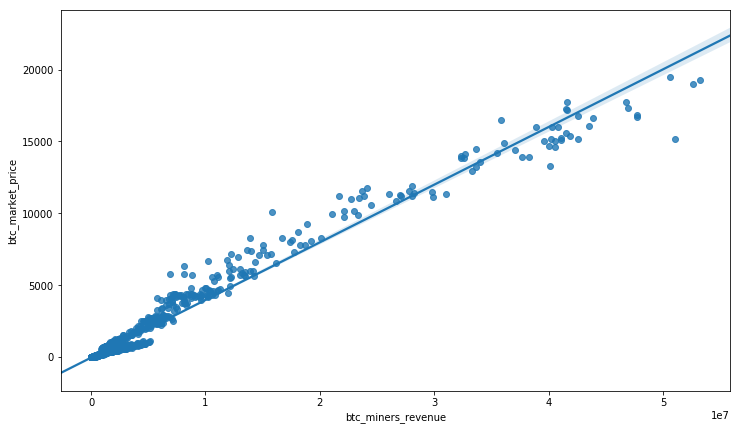

In [17]:
#Scatterplot between Bitcoin price & Bitcoin Miners Revenue
plt.figure(figsize=(12,7))
sns.regplot(x=data2['btc_miners_revenue'],y=data2['btc_market_price'],data=data2)

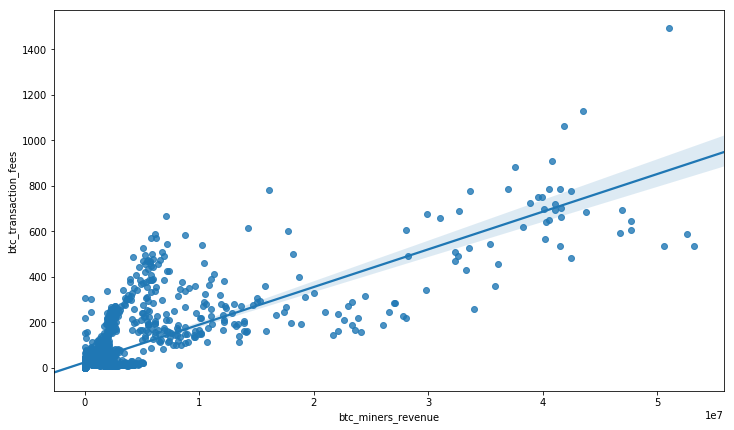

In [18]:
#Scatterplot between Bitcoin price & Bitcoin Transaction fees
plt.figure(figsize=(12,7))
sns.regplot(x=data2['btc_miners_revenue'],y=data2['btc_transaction_fees'],data=data2)

(<matplotlib.axes._subplots.AxesSubplot at 0x2cb0d694320>,
 Text(0.5,1,'Trading volume on major bitcoin Trend'))

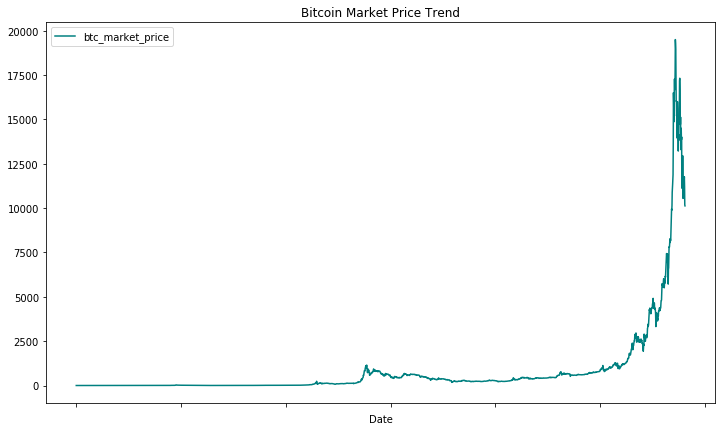

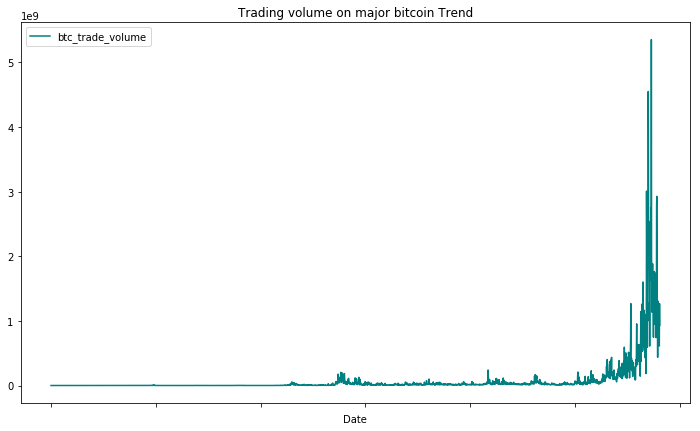

In [19]:
# Line chart for Bitcoin Market Price and Bitcoin Trade Volume trend
data2.plot(x='Date',y='btc_market_price',figsize=(12,7),kind='line',color='teal'),plt.title('Bitcoin Market Price Trend')
data2.plot(x='Date',y='btc_trade_volume',figsize=(12,7),kind='line',color='teal'),plt.title('Trading volume on major bitcoin Trend')


*** Data Processing for modeling ***

### We have dropped the date column since we have to treat the data as a cross sectional one.

In [20]:
# Dropping date column
data1.drop(['Date'],axis=1,inplace=True)

In [21]:
# Dropping date column
data2.drop(['Date'],axis=1,inplace=True)

In [22]:
# Defining independent and dependent variables
y1 = data1['btc_market_price']
X1 = data1.drop(['btc_market_price'],axis=1)
y2 = data2['btc_market_price']
X2 = data2.drop(['btc_market_price'],axis=1)

In [23]:
# Defining train and test dataset
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=100)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=100)

### We have used MinMaxScaler for scaling the independent variables since we data is not having Normal distribution.

In [24]:
# Using Min-Max scaler for scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [25]:
# Scaling
X1_train = scaler.fit_transform(X1_train)
X2_train = scaler.fit_transform(X2_train)
X1_test = scaler.fit_transform(X1_test)
X2_test = scaler.fit_transform(X2_test)

### Linear Regression 

In [26]:
# Linear Regression
from sklearn.linear_model import LinearRegression
linearreg = LinearRegression()

In [27]:
linreg1=linearreg.fit(X1_train,y1_train)
linreg2=linearreg.fit(X2_train,y2_train)

In [28]:
y1_predict=linreg1.predict(X1_test)
y2_predict=linreg2.predict(X2_test)

In [29]:
linreg1_score=linreg1.score(X1_test,y1_test)
linreg1_score

0.9805474712398816

In [30]:
linreg2_score=linreg2.score(X2_test,y2_test)
linreg2_score

0.989969707278697

In [31]:
# Printing regression results
print('BitCoin dataset')
print('linear model intercept: {}'
     .format(linreg1.intercept_))
print('linear model coeff:\n{}'
     .format(linreg1.coef_))
print('R-squared score (training): {:.3f}'
     .format(linearreg.score(X1_train, y1_train)))
print('R-squared score (test): {:.3f}'
     .format(linearreg.score(X1_test, y1_test)))

BitCoin dataset
linear model intercept: -7.305716719008387
linear model coeff:
[-2.65677863e+01  1.90338451e+04  1.53376207e+00 -2.48600829e+02
 -3.79074401e+01 -1.63837015e-01 -7.37570423e+01  5.27832331e+01
 -3.86994517e+02  5.01564010e+01 -6.38430692e+01 -8.16029391e+01
  1.26875977e+01  5.16384050e+02  1.27220234e+02  1.98273323e+02
  3.75883231e+02 -1.33807977e+02  2.57847823e+01 -2.07955815e+01
 -1.36714743e+01  1.51562744e+02]
R-squared score (training): 1.000
R-squared score (test): 0.981


In [32]:
# Printing regression results
print('BitCoin dataset')
print('linear model intercept: {}'
     .format(linreg2.intercept_))
print('linear model coeff:\n{}'
     .format(linreg2.coef_))
print('R-squared score (training): {:.3f}'
     .format(linearreg.score(X2_train, y2_train)))
print('R-squared score (test): {:.3f}'
     .format(linearreg.score(X2_test, y2_test)))

BitCoin dataset
linear model intercept: -7.305716719008387
linear model coeff:
[-2.65677863e+01  1.90338451e+04  1.53376207e+00 -2.48600829e+02
 -3.79074401e+01 -1.63837015e-01 -7.37570423e+01  5.27832331e+01
 -3.86994517e+02  5.01564010e+01 -6.38430692e+01 -8.16029391e+01
  1.26875977e+01  5.16384050e+02  1.27220234e+02  1.98273323e+02
  3.75883231e+02 -1.33807977e+02  2.57847823e+01 -2.07955815e+01
 -1.36714743e+01  1.51562744e+02]
R-squared score (training): 1.000
R-squared score (test): 0.990


In [33]:
#Cross Validation
from sklearn.cross_validation import cross_val_score

c:\python35\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [34]:
linreg_score1=cross_val_score(linearreg,X1,y1,cv=10,scoring='mean_squared_error')
linreg_score1

c:\python35\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
c:\python35\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
c:\python35\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
c:\python35\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
c:\python35\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Sco

array([-3.02572145e+04, -3.47554343e+02, -5.44752086e+01, -3.29363875e+01,
       -1.28750312e+03, -2.01511971e+02, -6.44947112e+01, -1.06803615e+02,
       -6.06763571e+02, -9.71189773e+05])

In [35]:
linreg_score2=cross_val_score(linearreg,X2,y2,cv=10,scoring='mean_squared_error')
linreg_score2

c:\python35\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
c:\python35\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
c:\python35\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
c:\python35\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
c:\python35\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Sco

array([-2.08747915e+05, -7.96470606e+02, -5.46917319e+02, -5.55259550e+01,
       -1.25812916e+03, -4.37980885e+02, -7.61175123e+01, -3.39149456e+02,
       -7.78525360e+02, -1.29175406e+06])

### LASSO regression

In [36]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [37]:
lasso_reg= Lasso(alpha=5 , max_iter= 1000)
param_grid = {'alpha':[0.01,1,2,5,10],
             'max_iter':[1000,10000]}

In [38]:
grid_search1= GridSearchCV(lasso_reg,param_grid, cv=5)
grid_search1.fit(X1_train, y1_train)
grid_search1.best_params_

{'alpha': 0.01, 'max_iter': 1000}

In [39]:
grid_search2= GridSearchCV(lasso_reg,param_grid, cv=5)
grid_search2.fit(X2_train, y2_train)
grid_search2.best_params_

{'alpha': 0.01, 'max_iter': 1000}

In [40]:
linlasso = Lasso(alpha=0.01, max_iter = 10000).fit(X1_train, y1_train)

print('Bitcoin dataset')
print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X1_train, y1_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X1_test, y1_test)))

Bitcoin dataset
lasso regression linear model intercept: -15.617748109735771
lasso regression linear model coeff:
[ 1.74337248e+01  1.88393348e+04 -0.00000000e+00 -7.46116681e+00
 -3.88674558e+01 -1.08670090e+00 -9.09628816e+01  3.93247101e+01
 -4.81293251e+02  2.13584154e+02  1.33205397e+02 -7.20622610e+01
  5.68212521e+00  5.27518190e+02  9.51861720e+01 -7.91242609e+01
  6.46913637e+01  1.92807337e+01  1.72750778e+02 -0.00000000e+00
 -1.79970231e+01  2.09443637e+02]
R-squared score (training): 1.000
R-squared score (test): 0.980



In [41]:
linlasso = Lasso(alpha=0.01, max_iter = 10000).fit(X2_train, y2_train)

print('Bitcoin dataset')
print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X2_train, y2_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X2_test, y2_test)))

Bitcoin dataset
lasso regression linear model intercept: -13.110247427488503
lasso regression linear model coeff:
[ 2.03647315e+00  1.89735480e+04 -1.66393975e+01  5.57815795e+01
 -2.25397088e+01 -7.54752256e-01 -7.49031593e+01  4.41031492e+01
 -3.72522592e+02  5.84679846e+01 -0.00000000e+00 -5.89680196e+01
  1.19743346e+00  5.05524247e+02  1.02427997e+02 -3.25591695e+01
  2.12660485e+01 -3.68194550e+01  1.58953698e+02 -5.16062132e+00
 -1.65167933e+01  1.95864651e+02]
R-squared score (training): 1.000
R-squared score (test): 0.990



In [42]:
lasso_score1=cross_val_score(lasso_reg,X1,y1,cv=10)
lasso_score1

array([-7.54186191e+04, -1.81839954e+01, -2.09474067e+02,  9.57389453e-01,
        9.84711178e-01,  9.58738133e-01,  9.50490392e-01,  9.49275518e-01,
        9.81990550e-01,  9.33784478e-01])

In [43]:
lasso_score2=cross_val_score(lasso_reg,X2,y2,cv=10)
lasso_score2

array([-8.83109610e+04, -1.87522214e+01, -3.61590684e+02,  9.11983922e-01,
        9.85276257e-01,  9.56192429e-01,  9.48898071e-01,  9.58566856e-01,
        9.84084982e-01,  9.34474876e-01])

### Ridge Regression

In [44]:
from sklearn.linear_model import Ridge

In [45]:
ridge_reg=Ridge(alpha=5 , max_iter= 1000)
param_grid = {'alpha':[0.01,1,2,5,10],
             'max_iter':[1000,10000]}

In [46]:
grid_search1= GridSearchCV(ridge_reg,param_grid, cv=5)
grid_search1.fit(X1_train, y1_train)
grid_search1.best_params_

{'alpha': 0.01, 'max_iter': 1000}

In [47]:
grid_search2= GridSearchCV(ridge_reg,param_grid, cv=5)
grid_search2.fit(X2_train, y2_train)
grid_search2.best_params_

{'alpha': 0.01, 'max_iter': 1000}

In [48]:
linridge = Ridge(alpha=0.01).fit(X1_train, y1_train)

print('Bitcoin dataset')   
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X1_train, y1_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X1_test, y1_test)))

Bitcoin dataset
ridge regression linear model intercept: -1.3146275366734699
ridge regression linear model coeff:
[-4.66126553e+01  1.74953902e+04  2.98300990e+01 -1.81851391e+03
 -1.31724016e+01 -1.73979768e+00 -5.58803049e+01  4.68757001e+01
 -8.80300658e+02  8.14146473e+02  1.48068651e+03 -2.52383202e+02
  2.95247303e+00  3.82549288e+02  8.45691136e+01  6.76148055e+01
  1.97269580e+03 -1.29311416e+02  1.17687371e+02 -2.75912919e+00
 -1.07278893e+01  2.87151095e+02]
R-squared score (training): 1.000
R-squared score (test): 0.980


In [49]:
linridge = Ridge(alpha=0.01).fit(X2_train, y2_train)

print('Bitcoin dataset')   
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X2_train, y2_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X2_test, y2_test)))

Bitcoin dataset
ridge regression linear model intercept: -4.108316683252838
ridge regression linear model coeff:
[-3.27855261e+01  1.79543095e+04 -2.83517267e+01 -2.69852199e+02
 -3.53307407e+01 -3.46204269e-01 -3.89036755e+01  6.35795320e+01
 -5.11707242e+02  3.48731148e+02  9.27495448e+02 -1.42068633e+02
  7.56457809e+00  4.47128751e+02  9.09568524e+01  1.10839671e+02
  4.41333689e+02 -1.94785458e+02  9.93749375e+01 -1.51859437e+01
 -2.08166994e+01  2.97762166e+02]
R-squared score (training): 1.000
R-squared score (test): 0.991


In [50]:
ridge_score1=cross_val_score(ridge_reg,X1,y1,cv=10)
ridge_score1

array([-4.05692278e+06, -6.77941644e+00, -1.88562442e+01,  9.80755355e-01,
        9.87475619e-01,  9.79966814e-01,  9.58941222e-01,  9.89778344e-01,
        9.85525486e-01,  9.57485372e-01])

In [51]:
ridge_score2=cross_val_score(ridge_reg,X2,y2,cv=10)
ridge_score2

array([-2.12864990e+07, -1.55126125e+01, -3.81319280e+02,  9.58573197e-01,
        9.87309411e-01,  9.59298706e-01,  9.56709058e-01,  9.68364617e-01,
        9.82950390e-01,  9.42043167e-01])

### Polynomial Regression 

In [52]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)

In [53]:
X1_train_poly=poly.fit_transform(X1_train)
X1_test_poly=poly.transform(X1_test)
X2_train_poly=poly.fit_transform(X2_train)
X2_test_poly=poly.transform(X2_test)

In [54]:
linreg = LinearRegression().fit(X1_train_poly, y1_train)

print('(poly deg 2) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2) R-squared score (training): {:.3f}'
     .format(linreg.score(X1_train_poly, y1_train)))
print('(poly deg 2) R-squared score (test): {:.3f}\n'
     .format(linreg.score(X1_test_poly, y1_test)))

(poly deg 2) linear model coeff (w):
[-7.34208727e-03  1.51892135e-01  4.14186109e+04 -7.87827121e+01
  7.19266454e+02  8.44830792e+01  1.69902657e+02  5.56738396e+01
  4.60414204e+01  9.37514844e+02 -3.36473146e+03  2.68419188e+03
  1.15543476e+02  6.94204861e-01  5.36589677e+03 -4.34015926e+02
 -3.95105683e+01 -1.11037283e+03  4.58010872e+01  1.42426400e+02
  7.96975313e+01  1.90848099e+01 -2.34900843e+06 -6.99333507e+00
 -2.17484675e+04 -5.16539761e+02 -3.95298040e+03 -3.01532478e+01
 -2.70158910e+02 -8.92575550e+01 -9.24315608e+01 -1.91903910e+03
  5.11842455e+03 -1.09953298e+03 -1.94456841e+02 -1.06212115e+03
 -3.79668267e+02  6.69284829e+02 -1.13876022e+02  4.52187327e+03
 -6.00528095e+01 -1.89634076e+02 -2.09346247e+02 -1.06271924e+02
 -1.13049708e+06 -3.95548769e+03 -1.15248113e+03 -7.25040658e+04
  4.23395321e+02 -1.26841370e+02 -6.27854740e+02 -1.14029760e+03
 -6.36163883e+03  3.15244345e+03  1.20497870e+04 -1.07790002e+03
 -1.77541528e+07 -1.71177348e+02  7.17419034e+02  1.5

In [55]:
linreg = LinearRegression().fit(X2_train_poly, y2_train)

print('(poly deg 2) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2) R-squared score (training): {:.3f}'
     .format(linreg.score(X2_train_poly, y2_train)))
print('(poly deg 2) R-squared score (test): {:.3f}\n'
     .format(linreg.score(X2_test_poly, y2_test)))

(poly deg 2) linear model coeff (w):
[ 5.33695909e-03 -6.41139349e+00  4.33127779e+04 -2.11615231e+02
 -3.06545723e+02  1.61955512e+01  2.16598640e+01  1.09714020e+02
  2.77135101e+00  8.54072341e+02 -4.34699216e+03 -3.30304356e+02
 -3.44184012e+01 -2.10742177e-01  3.03457487e+03 -4.59746318e+02
  1.17297748e+02  3.31011313e+01  4.84310599e+01  1.45020306e+02
 -2.12936216e+00  1.05281025e+02 -1.35625518e+06  1.26457407e+01
 -2.35375231e+04  1.48576198e+02  2.68865910e+02  8.65980893e+00
 -5.36868145e+01 -1.98647048e+02  8.83098012e-02 -1.24132812e+03
  5.83836057e+03 -1.03466197e+03  9.98288543e+01  6.23031206e+02
 -4.48122840e+01  8.32944221e+02 -3.01589244e+02  5.47638463e+01
 -6.58466635e+01 -1.85214098e+02 -3.93039277e+01 -2.89810430e+02
  4.57606448e+04 -5.19773628e+03 -1.91102577e+03 -2.53979760e+04
  3.03144930e+00  8.54951489e+01 -1.00238025e+03 -6.68898227e+02
 -4.61240896e+03  4.42240901e+03  1.42945362e+04 -6.04103198e+01
 -1.30271321e+07 -1.01046234e+03  7.97599257e+02  2.7

In [56]:
linreg = Ridge().fit(X1_train_poly, y1_train)

print('(poly deg 2 + ridge) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2 + ridge) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2 + ridge) R-squared score (training): {:.3f}'
     .format(linreg.score(X1_train_poly, y1_train)))
print('(poly deg 2 + ridge) R-squared score (test): {:.3f}'
     .format(linreg.score(X1_test_poly, y1_test)))

(poly deg 2 + ridge) linear model coeff (w):
[ 0.00000000e+00 -8.40848945e+01  1.28789527e+03  1.11644847e+02
 -1.18393028e+02  2.69208576e+02  4.01459664e+01 -7.30848166e+01
  1.95989194e+01 -1.58776174e+02  2.67876429e+02  6.06469462e+02
  1.36968121e+01  7.68515899e+00  5.36899429e+02  9.40081696e+01
  1.32472630e+02 -5.65337143e+01  8.53537295e+01  1.88085259e+01
 -1.90587243e+01 -1.28903681e+01  3.16086090e+02  9.09679509e+01
  1.23988974e+03  9.00665844e+01 -1.41038821e+02  1.96315576e+01
  8.12746282e+00 -1.05163119e+02  7.52276896e+01 -1.42242437e+02
  2.81354366e+02  5.54820099e+02  2.83040297e+01 -7.31702403e-02
  7.35729810e+02 -6.01538707e+00 -1.70196861e+01 -9.17168724e+01
 -5.70291035e+01 -6.34107741e+01  4.48706072e-01 -6.16984198e+01
  2.69728805e+02  5.99346304e+02  8.01702401e+01  1.06773078e+03
  1.08763089e+03  2.63277168e+00  9.82732963e+02  2.52300794e+02
  1.50692770e+02  3.90065552e+02  2.21649945e+02 -9.18443430e+01
  1.37601206e-02  3.85327515e+02  5.70391553e

In [57]:
linreg = Ridge().fit(X2_train_poly, y2_train)
print('(poly deg 2 + ridge) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2 + ridge) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2 + ridge) R-squared score (training): {:.3f}'
     .format(linreg.score(X2_train_poly, y2_train)))
print('(poly deg 2 + ridge) R-squared score (test): {:.3f}'
     .format(linreg.score(X2_test_poly, y2_test)))

(poly deg 2 + ridge) linear model coeff (w):
[ 0.00000000e+00 -8.31038417e+01  1.29757393e+03  1.04760926e+02
 -9.35253541e+01  2.88131955e+02  5.42646852e+01 -6.24534507e+01
  3.86032654e+01 -1.31864994e+02  1.27382737e+02  5.86031490e+02
 -5.86508244e+00  6.42767077e+00  4.78728352e+02  6.58857972e+01
  1.41061565e+02 -6.22025138e+01  6.30453480e+01  9.55700705e+00
 -2.30226409e+01 -1.56205864e+01  2.81369550e+02  6.44857795e+01
  1.25295482e+03  7.94418251e+01 -1.42950085e+02  1.48428327e+01
  1.00520545e+01 -1.05094720e+02  7.99871535e+01 -1.12575903e+02
  1.53795892e+02  5.38306461e+02 -1.44656093e-01 -1.06865540e-01
  7.13011952e+02 -2.41934937e+01 -1.22639792e+01 -9.96019393e+01
 -6.29524037e+01 -6.90252333e+01  6.35962727e+00 -6.12323334e+01
  2.40044479e+02  5.66699140e+02  3.40255655e+01  1.09424345e+03
  1.10436115e+03 -8.53583576e-02  1.03199601e+03  3.33783683e+02
  1.43083244e+02  4.09965910e+02  2.03837234e+02 -4.99169312e+01
  1.37473225e-02  3.62987533e+02  6.09473092e

In [58]:
linreg_score=cross_val_score(linreg,X2,y2,cv=10)
linreg_score

array([-2.29608252e+07, -1.55030904e+01, -3.70236364e+02,  9.58152244e-01,
        9.87350753e-01,  9.58383317e-01,  9.52228443e-01,  9.69223877e-01,
        9.82677503e-01,  9.42057633e-01])

### k-nn Regression

In [59]:
from sklearn.neighbors import KNeighborsRegressor

In [60]:
knnreg = KNeighborsRegressor(n_neighbors = 5).fit(X1_train, y1_train)

print('R-squared train score: {:.3f}'.format(knnreg.score(X1_train, y1_train)))
print('R-squared test score: {:.3f}'.format(knnreg.score(X1_test, y1_test)))

R-squared train score: 0.996
R-squared test score: 0.992


In [61]:
knnreg = KNeighborsRegressor(n_neighbors = 5).fit(X2_train, y2_train)

print('R-squared train score: {:.3f}'.format(knnreg.score(X2_train, y2_train)))
print('R-squared test score: {:.3f}'.format(knnreg.score(X2_test, y2_test)))

R-squared train score: 0.997
R-squared test score: 0.994


In [62]:
knnreg_score=cross_val_score(knnreg,X2,y2,cv=10)
knnreg_score

array([-3.14260476,  0.8152861 ,  0.14925399,  0.96381157,  0.93198697,
       -1.11463458, -3.78496803, -0.58750549,  0.62118803, -1.05611266])

### SVM Regression

In [66]:
#Grid Search of Linear SVM and obtaining best parameters
from sklearn.svm import SVR
svmlinear1 = SVR(kernel = 'linear')
param_grid = {'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 10, 50, 100],
              'gamma' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 10, 50, 100]}
grid_search_svmlinear1 = GridSearchCV(svmlinear1, param_grid, cv = 5)
grid_search_svmlinear1.fit(X1_train, y1_train.ravel())
print("Best Parameters for linear SVM: {}".format(grid_search_svmlinear1.best_params_))

Best Parameters for linear SVM: {'C': 100, 'gamma': 0.001}


In [67]:
# Linear SVM Regression
svm_lin1= SVR(kernel = 'linear', C=100, gamma=0.001).fit(X1_train, y1_train)
print('Bitcoin dataset')   
print('Linear SVM Regression model intercept: {}'
     .format(svm_lin1.intercept_))
print('Linear SVM Regression model coeff:\n{}'
     .format(svm_lin1.coef_))
print('R-squared score (training): {:.3f}'
     .format(svm_lin1.score(X1_train, y1_train)))
print('R-squared score (test): {:.3f}'
     .format(svm_lin1.score(X1_test, y1_test)))


Bitcoin dataset
Linear SVM Regression model intercept: [-0.03994648]
Linear SVM Regression model coeff:
[[-9.72289163e+01  3.78823045e+03  1.53200941e+03  1.00057685e+02
   2.36821849e+02  2.74218149e+01 -2.34077087e+01  6.83383947e+01
   2.25302443e+03  2.52763491e+03  3.12048067e+03  5.05301889e+02
   1.64922089e+00  1.48020297e+03  2.06741562e+02  1.13243799e+02
   2.26996460e+02 -4.96761376e+02 -4.86597122e+02 -1.06555007e+01
  -1.06778544e+01  2.67802464e+03]]
R-squared score (training): 0.961
R-squared score (test): 0.982


In [68]:
#Grid Search of Kernel SVM and obtaining best parameters
svmkernel1 = SVR(kernel = 'rbf')
param_grid = {'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 10, 50, 100], 
              'gamma' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 10, 50, 100]}
grid_search_svmkernel1 = GridSearchCV(svmkernel1, param_grid, cv = 5)
grid_search_svmkernel1.fit(X1_train, y1_train.ravel())
print("Best Parameters for kernel SVM: {}".format(grid_search_svmkernel1.best_params_))

Best Parameters for kernel SVM: {'C': 100, 'gamma': 0.5}


In [69]:
# Kernel SVM Regression
svm_ker1= SVR(kernel = 'rbf', C=100, gamma=0.5).fit(X1_train, y1_train)
print('Bitcoin dataset')   
print('Kernel SVM Regression model intercept: {}'
     .format(svm_ker1.intercept_))
print('R-squared score (training): {:.3f}'
     .format(svm_ker1.score(X1_train, y1_train)))
print('R-squared score (test): {:.3f}'
     .format(svm_ker1.score(X1_test, y1_test)))

Bitcoin dataset
Kernel SVM Regression model intercept: [2630.17015214]
R-squared score (training): 0.784
R-squared score (test): 0.782


In [70]:
#Grid Search of Linear SVM and obtaining best parameters
from sklearn.svm import SVR
svmlinear2 = SVR(kernel = 'linear')
param_grid = {'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 10, 50, 100],
              'gamma' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 10, 50, 100]}
grid_search_svmlinear2 = GridSearchCV(svmlinear2, param_grid, cv = 5)
grid_search_svmlinear2.fit(X2_train, y2_train.ravel())
print("Best Parameters for linear SVM: {}".format(grid_search_svmlinear2.best_params_))

Best Parameters for linear SVM: {'C': 100, 'gamma': 0.001}


In [71]:
# Linear SVM Regression
svm_lin2= SVR(kernel = 'linear', C=100, gamma=0.001).fit(X2_train, y2_train)
print('Bitcoin dataset')   
print('Linear SVM Regression model intercept: {}'
     .format(svm_lin2.intercept_))
print('Linear SVM Regression model coeff:\n{}'
     .format(svm_lin2.coef_))
print('R-squared score (training): {:.3f}'
     .format(svm_lin2.score(X2_train, y2_train)))
print('R-squared score (test): {:.3f}'
     .format(svm_lin2.score(X2_test, y2_test)))

Bitcoin dataset
Linear SVM Regression model intercept: [0.04690154]
Linear SVM Regression model coeff:
[[-1.02742014e+02  3.74915838e+03  1.53979264e+03  6.54305981e+01
   2.35731147e+02  1.86614261e+01  6.16897842e+00  8.25148359e+01
   2.30029318e+03  2.46590517e+03  3.06290701e+03  5.36840003e+02
   1.64677566e+00  1.36670101e+03  1.39869553e+02  4.46402763e+01
   2.75376825e+02 -4.74253482e+02 -5.17690052e+02 -1.59486305e+01
  -1.68033351e+01  2.58906115e+03]]
R-squared score (training): 0.962
R-squared score (test): 0.967


In [ ]:
svmlin_score=cross_val_score(svm_lin2,X2,y2,cv=10)
svmlin_score

In [72]:
#Grid Search of Kernel SVM and obtaining best parameters
svmkernel2 = SVR(kernel = 'rbf')
param_grid = {'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 10, 50, 100], 
              'gamma' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 10, 50, 100]}
grid_search_svmkernel2 = GridSearchCV(svmkernel2, param_grid, cv = 5)
grid_search_svmkernel2.fit(X2_train, y2_train.ravel())
print("Best Parameters for kernel SVM: {}".format(grid_search_svmkernel2.best_params_))

Best Parameters for kernel SVM: {'C': 100, 'gamma': 0.5}


In [73]:
# Kernel SVM Regression
svm_ker2= SVR(kernel = 'rbf', C=100, gamma=0.5).fit(X2_train, y2_train)
print('Bitcoin dataset')   
print('Kernel SVM Regression model intercept: {}'
     .format(svm_ker2.intercept_))
print('R-squared score (training): {:.3f}'
     .format(svm_ker2.score(X2_train, y2_train)))
print('R-squared score (test): {:.3f}'
     .format(svm_ker2.score(X2_test, y2_test)))

Bitcoin dataset
Kernel SVM Regression model intercept: [2493.74500102]
R-squared score (training): 0.794
R-squared score (test): 0.756


In [ ]:
svmkernel_score=cross_val_score(svmkernel2,X2,y2,cv=10)
svmkernel_score

### We have used KNN regressor to predict the values for the test data because R-squared values of the training and test datasets were 0.997 and 0.994 which is the highest among all the regression techniques.

### Predicting Test data using KNN

In [63]:
#Dropping the date column
test_data = test.drop(["Date"], axis = 1)

In [64]:
#Feature scaling
test_data = scaler.fit_transform(test_data)

In [65]:
#Apply KNN regression
y_pred = knnreg.predict(test_data)
y_pred

array([14150.876964 , 16778.073668 ,  1046.792    ,   933.37     ,
         417.226    ,  9880.48583  ,  7078.0175854,  4929.6887232,
        6412.6087758,  3833.59112  ,  6696.0654574, 11145.324334 ,
       10913.875334 , 11252.406934 ])